# Time Series Analyis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Steup the Data

In [4]:
df_1 = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=True)
# df_1.index # Used to verify that this is a date time index
df_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-16,1773.33,1786.24,1770.52,1777.43,1777.43,2763400
2019-10-17,1796.49,1798.85,1782.02,1787.48,1787.48,2647400
2019-10-18,1787.80,1793.98,1749.20,1757.51,1757.51,3362500
2019-10-21,1769.66,1785.88,1765.00,1785.66,1785.66,2130400
2019-10-22,1788.15,1789.78,1762.00,1765.73,1765.73,2111700
...,...,...,...,...,...,...
2020-10-09,3210.00,3288.99,3197.83,3286.65,3286.65,4907900
2020-10-12,3349.94,3496.24,3339.55,3442.93,3442.93,8364200
2020-10-13,3467.99,3492.38,3424.22,3443.63,3443.63,5744700


## Visualizations

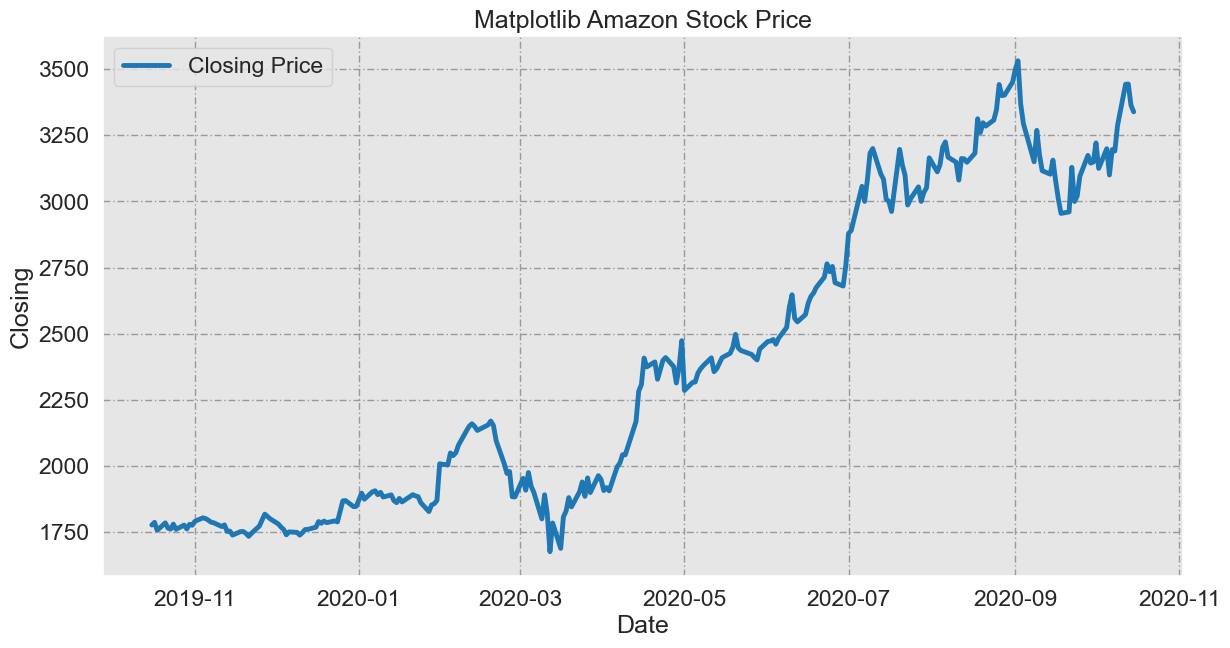

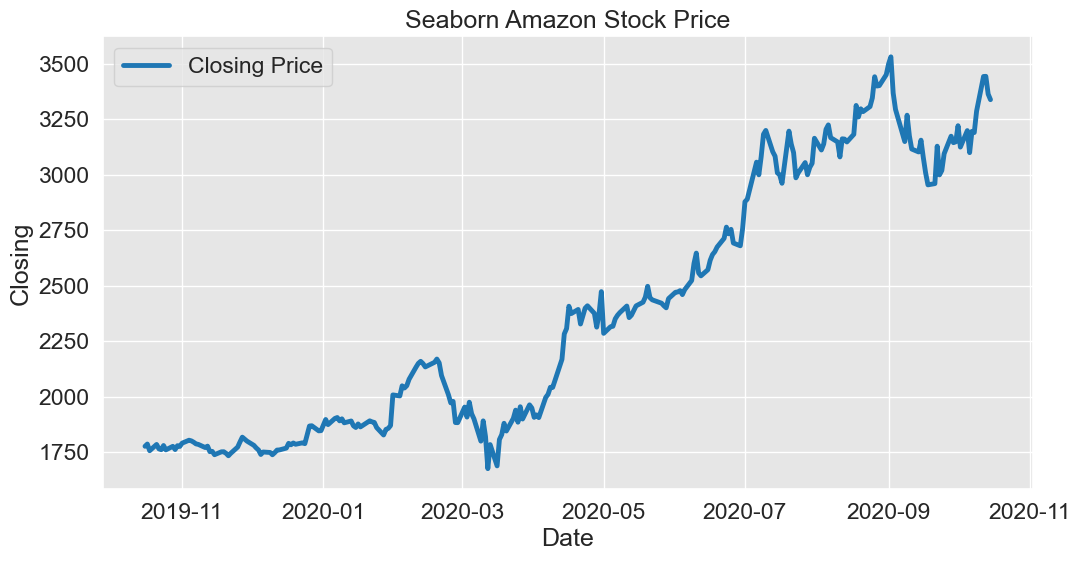

In [40]:
# Matplotlib
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Amazon Stock Price')
axes_1.plot(df_1.index, df_1['Close'], label='Closing Price')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

# Seaborn
fig_3 = plt.figure(figsize=(12,6), dpi=100)
axes_2 = sns.lineplot(data=df_1, x=df_1.index, y='Close',
                     label='Closing Price')
axes_2.set(xlabel='Date', ylabel='Closing')
axes_2.set_title('Seaborn Amazon Stock Price')
axes_2.legend(loc=0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":3.5})



## Plotly

In [41]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_1.index, 
                           y=df_1['Close'],
                          mode ='lines',
                          name='Closing Price'))
fig_2.update_layout(
    xaxis=dict(
            showgrid=True, showline=True, showticklabels=True),
    yaxis=dict(
            showgrid=True, showline=True, showticklabels=True),
    showlegend=True,
    xaxis_title='Date',
    yaxis_title='Closing Price',
    title='Plotly Amazon Stock Price'
)

## Matplotlib Finance

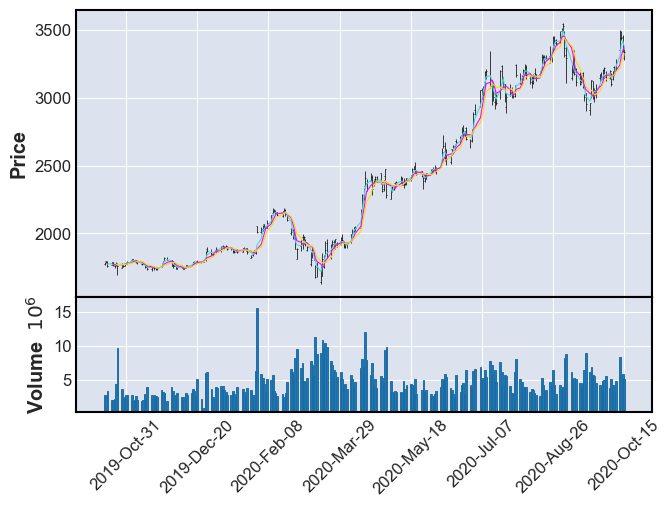

In [46]:
mpf.plot(df_1, type='ohlc', mav=(3,5,7), volume=True,
        show_nontrading=True)

## Plotting Time Periods & Styling

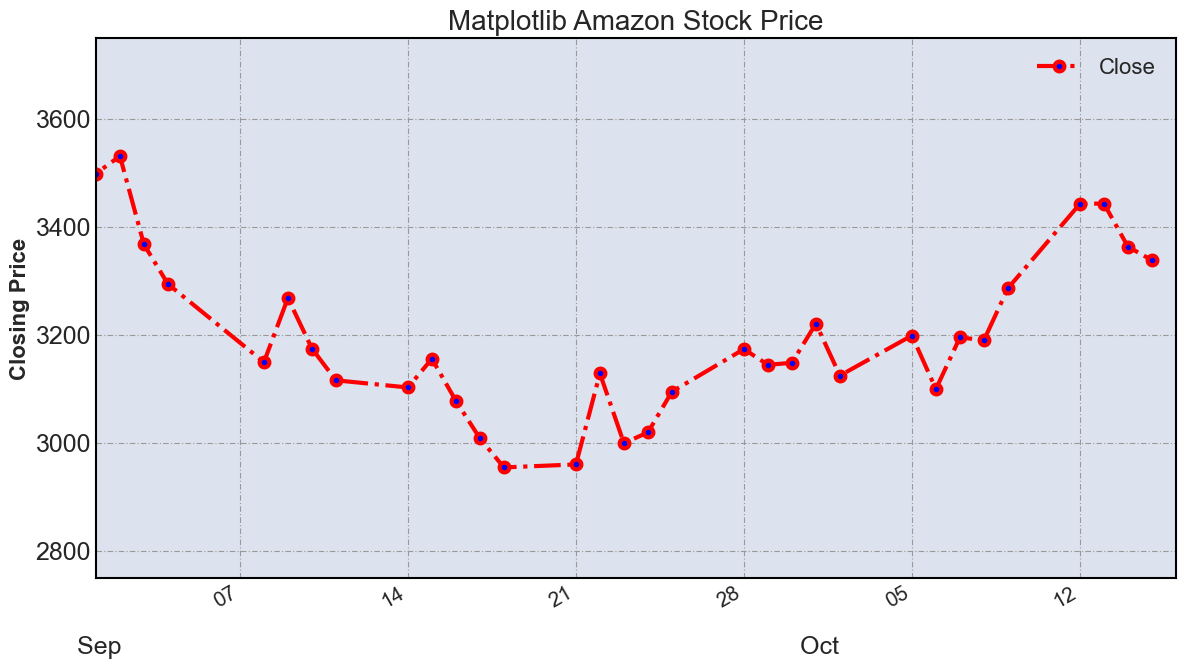

In [69]:
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Amazon Stock Price', fontsize=20)

df_1['Close'].plot(figsize=(12,6),
                  xlim=['2020-09-01', '2020-10-16'],
                  ylim=[2750, 3750],
                  color='red',
                  lw=3,
                  ls='-.',
                  marker='o',
                  markersize=7,
                  markerfacecolor='blue',
                  markeredgecolor='red',
                  markeredgewidth=3)
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

axes_1.tick_params(axis="x", labelsize=15)
axes_1.tick_params(axis="y", labelsize=18)

plt.xlabel('', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)

plt.legend(loc=0, prop={'size': 16})

axes_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

# https://matplotlib.org/stable/api/dates_api.html
# %Y - 4 digit Year
# %y - 2 digit year
# %m - month as a number
# %b - month as abbreviated name
# %d - day
# %a - abbreviated day

axes_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))
axes_1.xaxis.set_minor_locator(dates.MonthLocator())
axes_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n %b'))

axes_1.tick_params(axis="both", which='minor', labelsize=18)